In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### 한글 폰트 깨짐 해결

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,847 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import os

## 데이터 칼럼

- NO: 차량 고유번호
- CARTYPE: 차량타입
- RECEIPTIME: 예정일시
- SETTIME: 배차일시
- RIDETIME: 승차일시
- STARTPOS1:출발지구군
- STARTPOS2: 출발지상세
- ENDPOS1: 목적지구군
- ENDPOS2: 목적지상세

# 데이터 분석

In [ ]:
# 데이터 크기 확인
DATA_PATH = '/content/drive/MyDrive/[데청캠]시나브로/머신러닝 딥러닝 프로젝트/'
DATA_IN_PATH = '/content/drive/MyDrive/[데청캠]시나브로/머신러닝 딥러닝 프로젝트/'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
병원정보.csv               26.78MB
서울특별시사회복지시설목록.csv0.5MB
data_08-07.csv                0.0MB
21년_5월.csv                3.11MB
21년_3월.csv                2.88MB
21년_2월.csv                1.86MB
21년_1월.csv                2.28MB
20년_12월.csv               2.31MB
21년_4월.csv                3.04MB
21년_6월.csv                3.17MB
21년_7월.csv                3.07MB
20년_8월.csv                2.59MB
20년_9월.csv                2.13MB
20년_10월.csv               2.36MB
20년_11월.csv               2.8MB
year.csv                      48.23MB
train_year.csv                31.2MB
new_강서1.csv                0.0MB
all_data_08-07.csv            0.01MB
data_0726to0731.csv           0.0MB


In [ ]:
# 데이터 불러오기
JAN = pd.read_csv(DATA_PATH + '21년_1월.csv', engine='python', encoding='cp949')
FEB = pd.read_csv(DATA_PATH + '21년_2월.csv', engine='python', encoding='cp949')
MAR = pd.read_csv(DATA_PATH + '21년_3월.csv', engine='python', encoding='cp949')
APR = pd.read_csv(DATA_PATH + '21년_4월.csv', engine='python', encoding='cp949')
MAY = pd.read_csv(DATA_PATH + '21년_5월.csv', engine='python', encoding='cp949')
JUN = pd.read_csv(DATA_PATH + '21년_6월.csv', engine='python', encoding='cp949')
JUL = pd.read_csv(DATA_PATH + '21년_7월.csv', engine='python', encoding='cp949')
AUG = pd.read_csv(DATA_PATH + '20년_8월.csv', engine='python', encoding='cp949')
SEP = pd.read_csv(DATA_PATH + '20년_9월.csv', engine='python', encoding='cp949')
OCT = pd.read_csv(DATA_PATH + '20년_10월.csv', engine='python', encoding='cp949')
NOV = pd.read_csv(DATA_PATH + '20년_11월.csv', engine='python', encoding='cp949')
DEC = pd.read_csv(DATA_PATH + '20년_12월.csv', engine='python', encoding='cp949')
welfare = pd.read_csv(DATA_PATH + '서울특별시사회복지시설목록.csv', engine='python', encoding='cp949')
hospital = pd.read_csv(DATA_PATH + '병원정보.csv', engine='python')
use_data = pd.read_csv(DATA_PATH + 'data_08-07.csv')
year = pd.read_csv(DATA_PATH + 'year.csv', engine='python')
data_0726to0731 = pd.read_csv(DATA_PATH + 'data_0726to0731.csv')

ALL_DATA = [JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC, welfare, hospital, use_data]

In [ ]:
# 데이터의 간단한 정보 확인
def data_info(data):
    print('----------데이터 정보-----------')
    print(data.info())
    print('----------결측치 확인-----------')
    print(data.isnull().sum())
for D in ALL_DATA:
    data_info(D)

----------데이터 정보-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19033 entries, 0 to 19032
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   19033 non-null  int64 
 1   No           19033 non-null  int64 
 2   Cartype      19033 non-null  object
 3   Receipttime  19033 non-null  object
 4   Settime      19033 non-null  object
 5   Ridetime     19033 non-null  object
 6   Startpos1    19033 non-null  object
 7   Startpos2    19033 non-null  object
 8   Endpos1      19033 non-null  object
 9   Endpos2      19033 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.5+ MB
None
----------결측치 확인-----------
Unnamed: 0     0
No             0
Cartype        0
Receipttime    0
Settime        0
Ridetime       0
Startpos1      0
Startpos2      0
Endpos1        0
Endpos2        0
dtype: int64
----------데이터 정보-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15556 entries, 0 to 15555
D

### 월 별 장애인 택시 이용량 데이터 병합

In [ ]:
# 1월부터 12월까지 장애인 콜택시 이용량을 YEAR에 병합
YEAR = pd.concat([JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC])

In [ ]:
YEAR

,Unnamed: 0,No,Cartype,Receipttime,Settime,Ridetime,Startpos1,Startpos2,Endpos1,Endpos2
0,0,3551,중형 승합,2021-01-11 AM 12:02:48,2021-01-11 AM 12:03:56,2021-01-11 AM 12:49:38,강서구,가양제3동,마포구,합정동
1,1,804,중형승합,2021-01-11 AM 12:58:00,2021-01-11 AM 1:04:20,2021-01-11 AM 1:19:47,강북구,번제3동,노원구,중계1동
2,2,5727,중형승합,2021-01-11 AM 1:20:00,2021-01-11 AM 1:27:25,2021-01-11 AM 1:43:43,중구,회현동,성동구,왕십리제2동
3,3,5725,중형승합,2021-01-11 AM 1:47:00,2021-01-11 AM 1:57:12,2021-01-11 AM 2:44:30,중랑구,면목제2동,서초구,서초1동
4,4,7846,중형 승합,2021-01-11 AM 2:10:00,2021-01-11 AM 2:18:38,2021-01-11 AM 2:39:32,성동구,금호1가동,중랑구,면목제3.8동
...,...,...,...,...,...,...,...,...,...,...
19288,19288,8267,중형승합,2020-12-13 PM 10:45:00,2020-12-13 PM 10:46:42,2020-12-13 PM 10:54:00,중랑구,면목제4동,노원구,상계1동
19289,19289,5787,중형승합,2020-12-13 PM 11:08:10,2020-12-13 PM 11:17:14,2020-12-13 PM 11:50:23,강서구,가양제3동,마포구,합정동
19290,19290,5727,중형승합,2020-12-13 PM 11:22:00,2020-12-13 PM 11:29:45,2020-12-13 PM 11:53:12,강남구,역삼1동,동작구,사당제1동
19291,19291,4744,중형 승합,2020-12-13 PM 11:36:00,2020-12-13 PM 11:43:47,2020-12-13 PM 11:56:50,동대문구,장안제2동,동대문구,답십리제4동


# 각 데이터 분석

### 1월달 장애인 택시 이용량

In [ ]:
JAN.head(5)

,Unnamed: 0,No,Cartype,Receipttime,Settime,Ridetime,Startpos1,Startpos2,Endpos1,Endpos2
0,0,3551,중형 승합,2021-01-11 AM 12:02:48,2021-01-11 AM 12:03:56,2021-01-11 AM 12:49:38,강서구,가양제3동,마포구,합정동
1,1,804,중형승합,2021-01-11 AM 12:58:00,2021-01-11 AM 1:04:20,2021-01-11 AM 1:19:47,강북구,번제3동,노원구,중계1동
2,2,5727,중형승합,2021-01-11 AM 1:20:00,2021-01-11 AM 1:27:25,2021-01-11 AM 1:43:43,중구,회현동,성동구,왕십리제2동
3,3,5725,중형승합,2021-01-11 AM 1:47:00,2021-01-11 AM 1:57:12,2021-01-11 AM 2:44:30,중랑구,면목제2동,서초구,서초1동
4,4,7846,중형 승합,2021-01-11 AM 2:10:00,2021-01-11 AM 2:18:38,2021-01-11 AM 2:39:32,성동구,금호1가동,중랑구,면목제3.8동


### 사회복지시설 현황

In [ ]:
welfare.head(5)

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소
0,서울꽃동네신내노인요양원,A0001,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,1126000000,중랑구,서울특별시 중랑구 신내로 194
1,청운양로원,A0002,(노인) 양로시설,노인주거복지시설,자치구,이종명,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동)
2,청운노인요양원,A0003,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동)
3,홍파양로원,A0004,(노인) 양로시설,노인주거복지시설,자치구,김우리,1135000000,노원구,서울특별시 노원구 동일로248길 30 (상계동)
4,천사노인요양원,A0007,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,1150000000,강서구,서울특별시 강서구 강서로45다길 30-22


### 의료시설 현황

In [ ]:
hospital.head(5)

,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,주소,전화번호,병원URL,개설일자,총의사수,의과일반의 인원수,의과인턴 인원수,의과레지던트 인원수,의과전문의 인원수,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표
0,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교인천성모병원,1,상급종합,220000,인천,220003,인천부평구,NaN,21431,인천광역시 부평구 동수로 56 (부평동),032-1544-9004,http://www.cmcism.or.kr/,19810806.0,324,3,20,68,230,1,0,0,2,0,0,0,0,126.724899,37.484831
1,JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...,강릉아산병원,1,상급종합,320000,강원,320100,강릉시,NaN,25440,강원도 강릉시 사천면 방동길 38 (),033-610-3114,http://www.gnah.co.kr,19960730.0,203,1,0,41,159,0,0,0,2,0,0,0,0,128.857841,37.818433
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,상급종합,110000,서울,110016,종로구,NaN,3181,서울특별시 종로구 새문안로 29 (평동),02-2001-2001,http://www.kbsmc.co.kr,19790324.0,403,3,26,134,233,3,0,0,4,0,0,0,0,126.967750,37.568408
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,건국대학교병원,1,상급종합,110000,서울,110023,광진구,NaN,5030,서울특별시 광진구 능동로 120-1 (화양동),1588-1533,http://www.kuh.ac.kr,19821116.0,442,8,36,155,240,0,0,0,3,0,0,0,0,127.071828,37.540376
4,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경북대학교병원,1,상급종합,230000,대구,230006,대구중구,NaN,41944,"대구광역시 중구 동덕로 130 (삼덕동2가, 경북대학교병원)",053-200-5114,http://knumc.knu.ac.kr,19100907.0,487,5,66,195,220,0,0,0,1,0,0,0,0,128.604125,35.866774


### use_data (일별 차량운행 희망건, 탑승건, 대기시간, 요금, 승차거리)

In [ ]:
use_data

,기준일,차량운행,희망건,탑승건,평균대기시간,평균요금,평균승차거리
0,2020-08-10,500,4758,3914,37.6,2209,8210
1,2020-08-11,518,4516,3722,32.0,2220,8330
2,2020-08-12,543,4795,4079,32.3,2249,8684
3,2020-08-13,528,4581,3913,33.7,2276,8804
4,2020-08-14,528,4299,3639,27.6,2262,8763
...,...,...,...,...,...,...,...
79,2021-07-07,565,5101,4491,34.0,2217,8394
80,2021-07-08,571,5097,4467,31.2,2179,8123
81,2021-07-09,567,4963,4337,31.3,2201,8314
82,2021-07-10,299,1808,1643,25.0,2337,9297


# 필요한 칼럼 추가

In [ ]:
YEAR['Receipttime'] = pd.to_datetime(YEAR['Receipttime'], format='%Y-%m-%d %p %I:%M:%S').dt.strftime('%Y-%m-%d %H:%M:%S')
YEAR['Settime'] = pd.to_datetime(YEAR['Settime'], format='%Y-%m-%d %p %I:%M:%S').dt.strftime('%Y-%m-%d %H:%M:%S')
YEAR['Ridetime'] = pd.to_datetime(YEAR['Ridetime'], format='%Y-%m-%d %p %I:%M:%S').dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
YEAR

,Unnamed: 0,No,Cartype,Receipttime,Settime,Ridetime,Startpos1,Startpos2,Endpos1,Endpos2
0,0,3551,중형 승합,2021-01-11 00:02:48,2021-01-11 00:03:56,2021-01-11 00:49:38,강서구,가양제3동,마포구,합정동
1,1,804,중형승합,2021-01-11 00:58:00,2021-01-11 01:04:20,2021-01-11 01:19:47,강북구,번제3동,노원구,중계1동
2,2,5727,중형승합,2021-01-11 01:20:00,2021-01-11 01:27:25,2021-01-11 01:43:43,중구,회현동,성동구,왕십리제2동
3,3,5725,중형승합,2021-01-11 01:47:00,2021-01-11 01:57:12,2021-01-11 02:44:30,중랑구,면목제2동,서초구,서초1동
4,4,7846,중형 승합,2021-01-11 02:10:00,2021-01-11 02:18:38,2021-01-11 02:39:32,성동구,금호1가동,중랑구,면목제3.8동
...,...,...,...,...,...,...,...,...,...,...
19288,19288,8267,중형승합,2020-12-13 22:45:00,2020-12-13 22:46:42,2020-12-13 22:54:00,중랑구,면목제4동,노원구,상계1동
19289,19289,5787,중형승합,2020-12-13 23:08:10,2020-12-13 23:17:14,2020-12-13 23:50:23,강서구,가양제3동,마포구,합정동
19290,19290,5727,중형승합,2020-12-13 23:22:00,2020-12-13 23:29:45,2020-12-13 23:53:12,강남구,역삼1동,동작구,사당제1동
19291,19291,4744,중형 승합,2020-12-13 23:36:00,2020-12-13 23:43:47,2020-12-13 23:56:50,동대문구,장안제2동,동대문구,답십리제4동


### 승차일시 - 배차일시 (set_to_ride)

In [ ]:
# 배차가 되고 승차를 하기까지 걸린 시간 계산하여 set_to_ride 칼럼에 추가

YEAR['Settime'] = pd.to_datetime(YEAR['Settime'], format='%Y-%m-%d %H:%M:%S')
YEAR['Ridetime'] = pd.to_datetime(YEAR['Ridetime'], format='%Y-%m-%d %H:%M:%S')
YEAR['set_to_ride'] = YEAR['Ridetime'] - YEAR['Settime']

In [ ]:
YEAR.head(5)

,Unnamed: 0,No,Cartype,Receipttime,Settime,Ridetime,Startpos1,Startpos2,Endpos1,Endpos2,set_to_ride
0,0,3551,중형 승합,2021-01-11 00:02:48,2021-01-11 00:03:56,2021-01-11 00:49:38,강서구,가양제3동,마포구,합정동,0 days 00:45:42
1,1,804,중형승합,2021-01-11 00:58:00,2021-01-11 01:04:20,2021-01-11 01:19:47,강북구,번제3동,노원구,중계1동,0 days 00:15:27
2,2,5727,중형승합,2021-01-11 01:20:00,2021-01-11 01:27:25,2021-01-11 01:43:43,중구,회현동,성동구,왕십리제2동,0 days 00:16:18
3,3,5725,중형승합,2021-01-11 01:47:00,2021-01-11 01:57:12,2021-01-11 02:44:30,중랑구,면목제2동,서초구,서초1동,0 days 00:47:18
4,4,7846,중형 승합,2021-01-11 02:10:00,2021-01-11 02:18:38,2021-01-11 02:39:32,성동구,금호1가동,중랑구,면목제3.8동,0 days 00:20:54


### 배차일시 - 예정일시 (receipt_to_set)

In [ ]:
# 승차 예약을 하고 배차가 되기까지 걸린 시간 계산하여 receipt_to_set 칼럼에 추가
YEAR['Receipttime'] = pd.to_datetime(YEAR['Receipttime'], format='%Y-%m-%d %H:%M:%S')
YEAR['receipt_to_set'] = YEAR['Settime'] - YEAR['Receipttime']

In [ ]:
YEAR.head(5)

,Unnamed: 0,No,Cartype,Receipttime,Settime,Ridetime,Startpos1,Startpos2,Endpos1,Endpos2,set_to_ride,receipt_to_set
0,0,3551,중형 승합,2021-01-11 00:02:48,2021-01-11 00:03:56,2021-01-11 00:49:38,강서구,가양제3동,마포구,합정동,0 days 00:45:42,0 days 00:01:08
1,1,804,중형승합,2021-01-11 00:58:00,2021-01-11 01:04:20,2021-01-11 01:19:47,강북구,번제3동,노원구,중계1동,0 days 00:15:27,0 days 00:06:20
2,2,5727,중형승합,2021-01-11 01:20:00,2021-01-11 01:27:25,2021-01-11 01:43:43,중구,회현동,성동구,왕십리제2동,0 days 00:16:18,0 days 00:07:25
3,3,5725,중형승합,2021-01-11 01:47:00,2021-01-11 01:57:12,2021-01-11 02:44:30,중랑구,면목제2동,서초구,서초1동,0 days 00:47:18,0 days 00:10:12
4,4,7846,중형 승합,2021-01-11 02:10:00,2021-01-11 02:18:38,2021-01-11 02:39:32,성동구,금호1가동,중랑구,면목제3.8동,0 days 00:20:54,0 days 00:08:38


### 예정일시 - 승차일시 (receipt_to_ride)

In [ ]:
# 승차 예약을 하고 실제로 승차를 하기까지 걸린 시간을 계산하여 receipt_to_ride 칼럼에 추가
YEAR['receipt_to_ride'] = YEAR['Ridetime'] - YEAR['Receipttime']

In [ ]:
YEAR.head(5)

,Unnamed: 0,No,Cartype,Receipttime,Settime,Ridetime,Startpos1,Startpos2,Endpos1,Endpos2,set_to_ride,receipt_to_set,receipt_to_ride
0,0,3551,중형 승합,2021-01-11 00:02:48,2021-01-11 00:03:56,2021-01-11 00:49:38,강서구,가양제3동,마포구,합정동,0 days 00:45:42,0 days 00:01:08,0 days 00:46:50
1,1,804,중형승합,2021-01-11 00:58:00,2021-01-11 01:04:20,2021-01-11 01:19:47,강북구,번제3동,노원구,중계1동,0 days 00:15:27,0 days 00:06:20,0 days 00:21:47
2,2,5727,중형승합,2021-01-11 01:20:00,2021-01-11 01:27:25,2021-01-11 01:43:43,중구,회현동,성동구,왕십리제2동,0 days 00:16:18,0 days 00:07:25,0 days 00:23:43
3,3,5725,중형승합,2021-01-11 01:47:00,2021-01-11 01:57:12,2021-01-11 02:44:30,중랑구,면목제2동,서초구,서초1동,0 days 00:47:18,0 days 00:10:12,0 days 00:57:30
4,4,7846,중형 승합,2021-01-11 02:10:00,2021-01-11 02:18:38,2021-01-11 02:39:32,성동구,금호1가동,중랑구,면목제3.8동,0 days 00:20:54,0 days 00:08:38,0 days 00:29:32


#데이터 시각화

### 월 별 차량운행수, 희망건수, 탑승건수, 탑승건/희망건

In [ ]:
#월별 차량운행수, 희망건수, 탑승건수, 탑승건/희망건 
#데이터 불러오기
import warnings
warnings.filterwarnings(action='ignore')
use_data['기준일'] = pd.to_datetime(use_data['기준일'])
use_data['y-m'] = use_data['기준일'].dt.strftime('%Y-%m')

per_month = pd.DataFrame({'y-m':['2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07']})
per_month['y-m'] = pd.to_datetime(per_month['y-m'])
per_month['y-m'] = per_month['y-m'].dt.strftime('%Y-%m')
per_month.set_index("y-m", inplace = True )

per_month['차량운행'] = use_data.groupby(by =['y-m']).sum()['차량운행']
per_month['희망건'] = use_data.groupby(by =['y-m']).sum()['희망건']
per_month['탑승건'] = use_data.groupby(by =['y-m']).sum()['탑승건']
per_month['탑승건/희망건'] = per_month['탑승건']/ per_month['희망건']

use_data.groupby(by =['y-m']).sum()['희망건']
per_month = per_month.reset_index()


### 월 별 차량운행 수

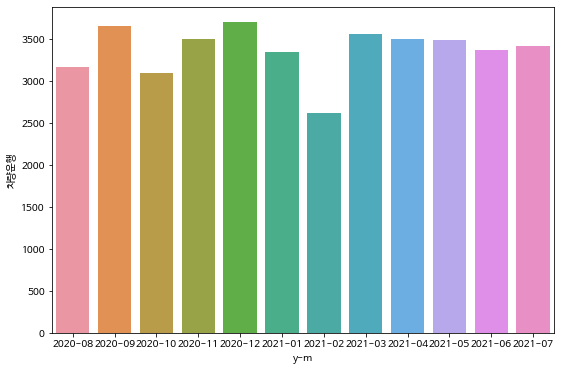

In [ ]:
# 매 달 차량운행 수는 크게 차이를 보이지 않았지만 2월달에 운행 수가 적은 것으로 확인
plt.figure(figsize =[9,6])
sns.barplot(x = 'y-m',y = '차량운행', data = per_month)

### 월 별 희망건수

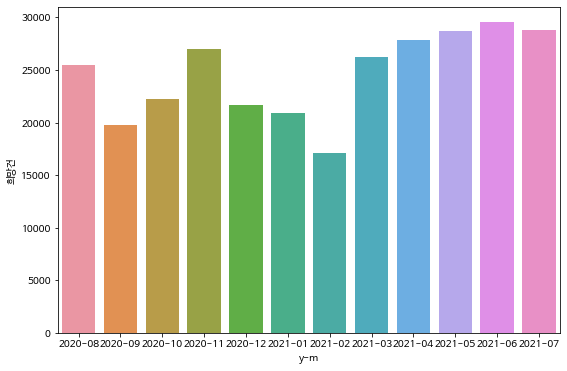

In [ ]:
# 상반기에 희망건수가 많았으며, 2월달에는 희망 건수가 적은 것을 확인
plt.figure(figsize =[9,6])
sns.barplot(x = 'y-m',y = '희망건', data = per_month)

### 월 별 탑승건수

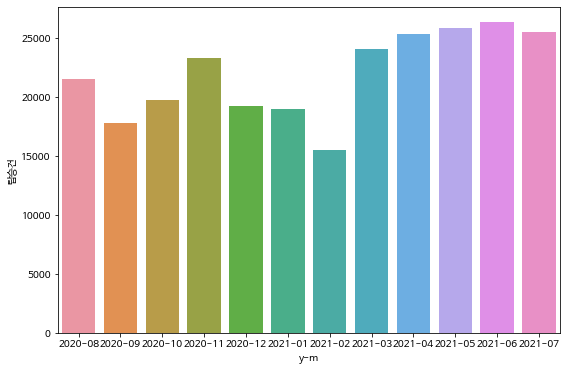

In [ ]:
# 월 별 실제 탑승 건수는 2월이 가장 적고 상반기가 하반기에 비해 많은 것을 확인
plt.figure(figsize =[9,6])
sns.barplot(x = 'y-m',y = '탑승건', data = per_month)

### 월 별 탑승건/희망건

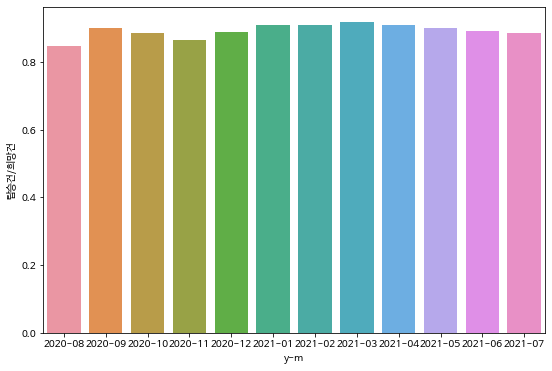

In [ ]:
# 월 별 탑승권/희망건의 수는 매 달 거의 비슷한 것으로 보아 
# 탑승을 희망하는 사람들 중 실제 탑승을 하는 사람들의 비율은 거의 비슷한 것을 확인
plt.figure(figsize =[9,6])
sns.barplot(x = 'y-m',y = '탑승건/희망건', data = per_month)

### 출발지 별 이용자 수

Text(0.5, 1.0, '출발지 별 이용자 수')

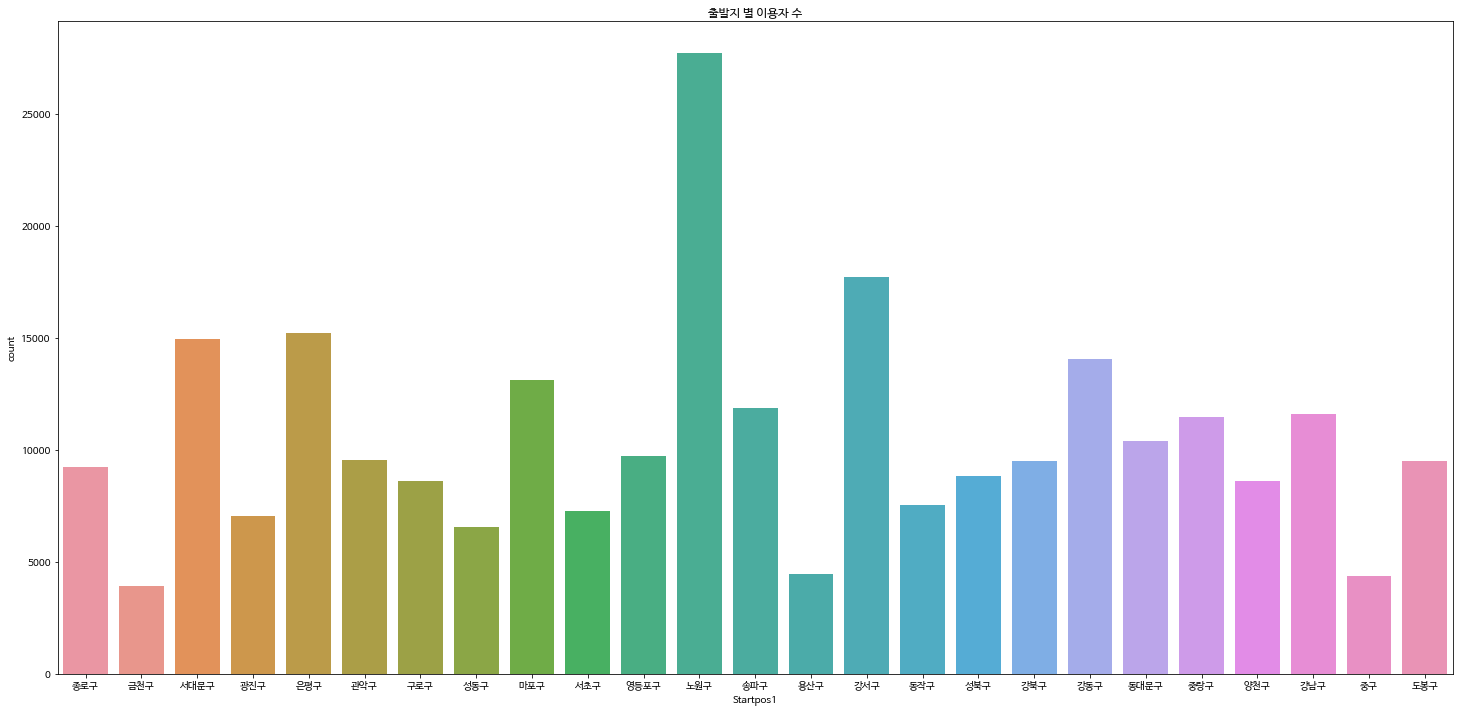

In [ ]:
#출발지 별 이용자는 노원구 > 강서구 > 은평구 > 서대문구 .. 순으로
# 노원구가 가장 많고, 금천구가 가장 적은 것으로 확인
plt.figure(figsize=(25,12))
sns.countplot(data = YEAR, x="Startpos1", order= combine['지역'].value_counts().index)
plt.title('출발지 별 이용자 수')

### 도착지 별 이용자 수

Text(0.5, 1.0, '도착지 별 이용자 수')

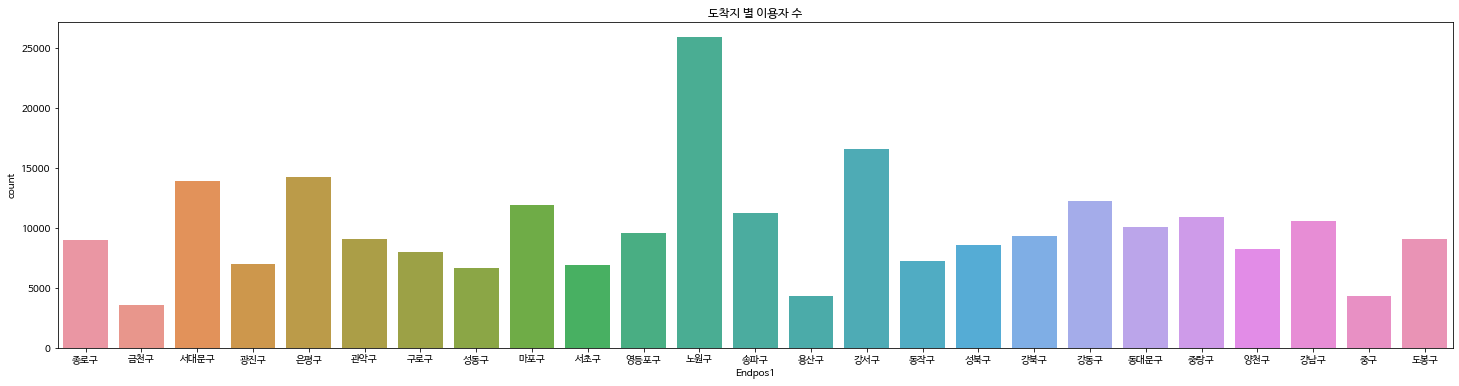

In [ ]:
# 도착지 별 이용자는 노원구 > 강서구 > 은평구 > 서대문구 > 마포구.. 순으로
# 노원구가 가장 많고, 금천구가 가장 적은 것으로 확인
# 강남구 출발보다 강남구 도착이 더 적은 것을 확인
plt.figure(figsize=(25,6))
sns.countplot(data = YEAR, x="Endpos1", order= combine['지역'].value_counts().index)
plt.title('도착지 별 이용자 수')

### 지역 별 병원 분포

Text(0.5, 1.0, '지역 별 병원 분포')

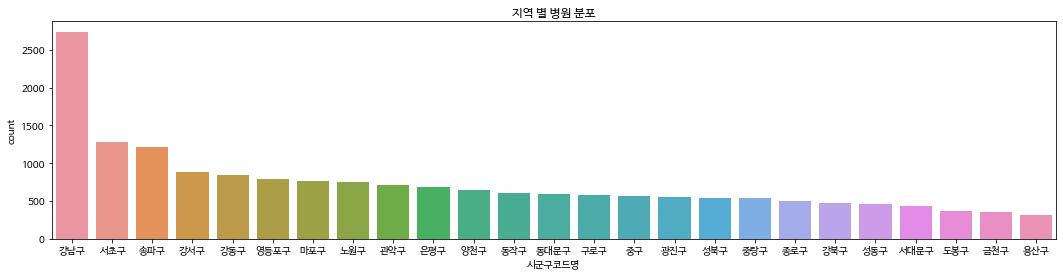

In [ ]:
# 강남구 > 서초구 > 송파구 > 강서구 > 강동구 순으로 지역 별 병원이 많은 것을 확인
new_hospital = hospital[hospital['시도코드명'] == '서울']
plt.figure(figsize=(18,4))
sns.countplot(data = new_hospital , x="시군구코드명", order= new_hospital['시군구코드명'].value_counts().index)
plt.title('지역 별 병원 분포')

### 지역 별 복지시설 분포

Text(0.5, 1.0, '지역 별 복지시설 분포')

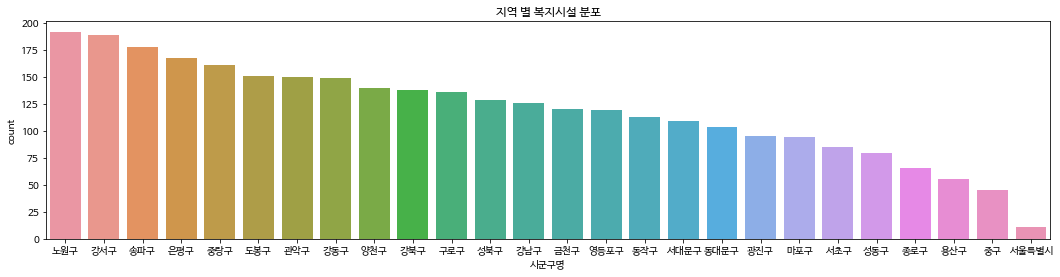

In [ ]:
# 노원구 > 강서구 > 송파구 > 은평구 순으로 지역 별 복지시설이 많은 것을 확인
plt.figure(figsize=(18,4))
sns.countplot(data = welfare , x="시군구명", order= welfare['시군구명'].value_counts().index)
plt.title('지역 별 복지시설 분포')

### 장애인 복지관, 서울특별시 병원 분포

In [ ]:
 # 장애인 복지관 데이터
contain_welfare = welfare['시설종류명(시설유형)'].str.contains('(장애인)')    #장애인 복지관 데이터
new_welfare = welfare[contain_welfare]

 # 서울특별시 병원 데이터
drop_hospital = hospital.drop([62202])
contain_hospital = drop_hospital['주소'].str.contains('서울특별시')
new_hospital = drop_hospital[contain_hospital] 

# value_counts() 로 데이터 프레임 만들기 
place1 = YEAR['Endpos1'].value_counts()
place1_df = pd.DataFrame(place1)
del_place1 = place1_df[place1_df['Endpos1'] > 1600]
place1_df = del_place1
place2 = new_hospital['시군구코드명'].value_counts()
error = new_welfare[new_welfare['시군구명'] == '서울특별시'].index
real_welfare = new_welfare.drop(error)
place3 = real_welfare['시군구명'].value_counts()
place2_df = pd.DataFrame(place2)
place3_df = pd.DataFrame(place3)

# 데이터 프레임들 조인하기
combine1 = place1_df.join(place2_df, how ='left')
combine = combine1.join(place3_df, how='left')

# 지역 컬럼 추가
combine['지역'] = ['노원구', '강서구', '은평구', '서대문구', '송파구', '마포구', '강동구', '중랑구', '동대문구', '강남구',
       '영등포구', '종로구', '강북구', '도봉구', '관악구', '성북구', '양천구', '구로구', '서초구', '동작구',
       '성동구', '광진구', '용산구', '중구', '금천구']

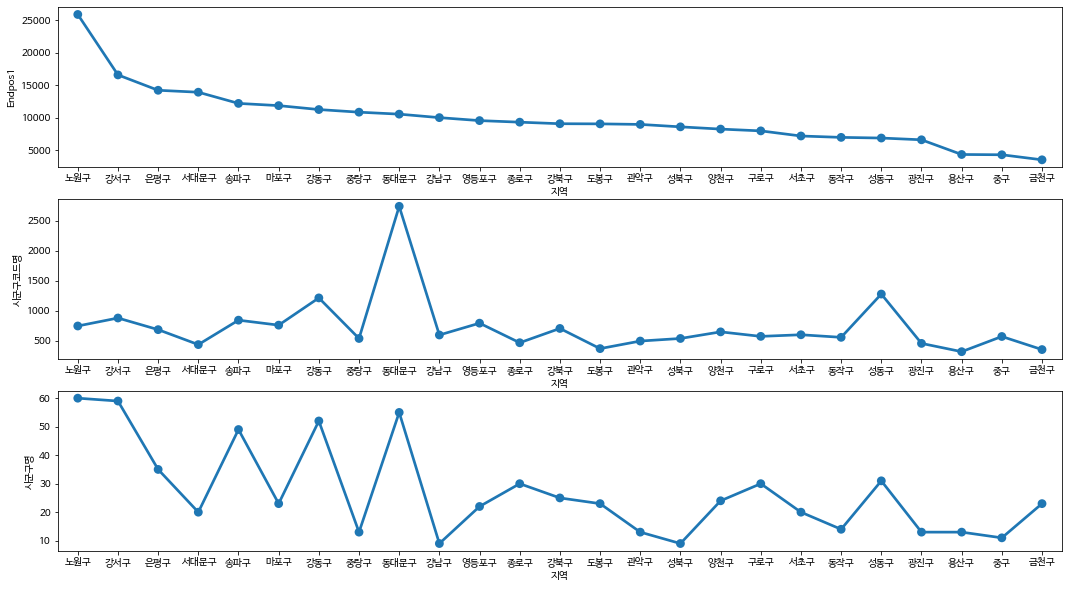

In [ ]:
# 그래프 그리기    
fig,(ax1, ax2, ax3) = plt.subplots(nrows=3)
fig.set_size_inches(18,10)

sns.pointplot(data = combine , x = '지역', y = 'Endpos1', ax=ax1)  # 목적지 통계
sns.pointplot(data = combine , x = '지역', y = '시군구코드명',ax=ax2)  # 지역별 병원 수 
sns.pointplot(data = combine , x = '지역', y = '시군구명', ax=ax3)  # 지역별 장애인 시설 수

### 장소별 대기시간 평균

In [ ]:
avg = pd.DataFrame(year[['receipt_to_ride', 'Startpos1']])
avg = avg.sort_values('Startpos1', ascending=True)
drop_list = ['구리시', '김포시',
       '성남시중원구', '양주시', '광명시', '남양주시', '부천시오정구', '부천시소사구', '안양시만안구',
       '하남시', '의정부시', '과천시', '부천시원미구', '고양시일산동구', '성남시수정구', '부평구',
       '고양시덕양구', '성남시분당구', '안양시동안구', '고양시일산서구', '양평군', '수원시팔달구', '수원시권선구', '용인시수지구']

for i in drop_list:
  idx = avg[avg['Startpos1'] == i].index
  avg.drop(idx, inplace=True)

avg = avg.dropna()

In [ ]:
avg

,receipt_to_ride,Startpos1
253136,0 days 00:36:46,강남구
247792,0 days 00:28:08,강남구
151794,0 days 00:42:22,강남구
31833,0 days 00:23:25,강남구
151795,0 days 00:10:17,강남구
...,...,...
155744,0 days 01:03:11,중랑구
155657,0 days 01:01:16,중랑구
58138,0 days 00:12:37,중랑구
252032,0 days 00:36:39,중랑구


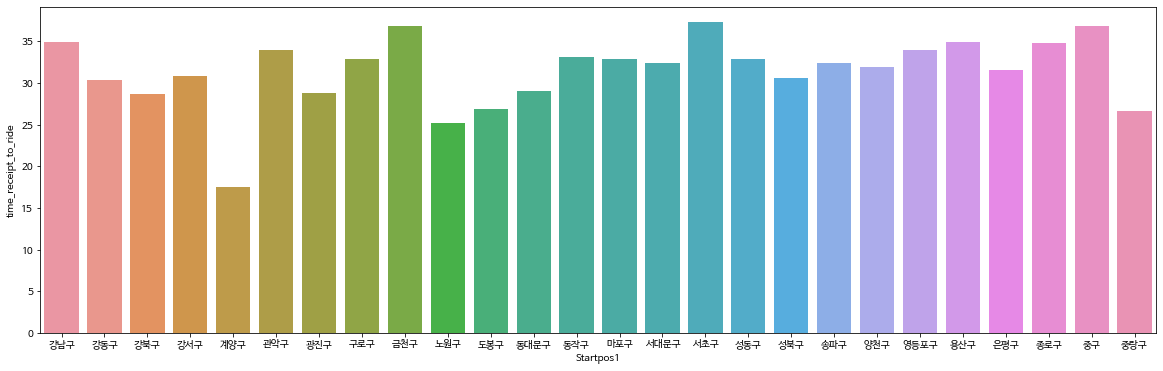

In [ ]:
# 0 days 삭제
avg['receipt_to_ride'] = avg['receipt_to_ride'].str.replace('0 days ','' )
#-1days => 대기시간 0으로 처리
condition = (avg['receipt_to_ride'].str.contains('-1 days'))
condition = avg[condition == True].index
avg.loc[condition,'receipt_to_ride'] = '00:00:00'

#대기 시간 분단위로 계산하여 컬럼 생성
avg['time_receipt_to_ride'] =  pd.DatetimeIndex(avg['receipt_to_ride']).hour * 60 + pd.DatetimeIndex(avg['receipt_to_ride']).minute

plt.figure(figsize =[20,6])
sns.barplot(x =avg.groupby(by =['Startpos1']).mean().index , y = avg.groupby(by =['Startpos1']).mean()['time_receipt_to_ride'], data = avg)

### 월 별 장애인 택시 이용량 (YEAR[Ridetime] 데이터 기준)

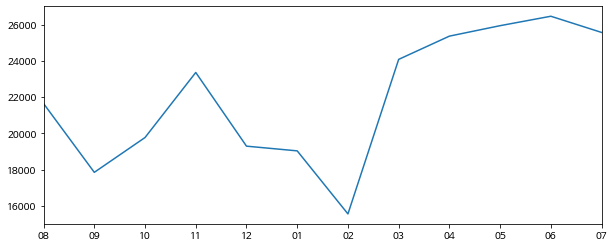

In [ ]:
# 월 별 장애인 택시 이용량은 2월에 가장 적고, 6월에 가장 많은 것을 확인
YEAR['month'] = YEAR['Ridetime'].dt.strftime('%m')

YEAR_08 = YEAR[YEAR['month'] == '08']
YEAR_09 = YEAR[YEAR['month'] == '09']
YEAR_10 = YEAR[YEAR['month'] == '10']
YEAR_11 = YEAR[YEAR['month'] == '11']
YEAR_12 = YEAR[YEAR['month'] == '12']
YEAR_01 = YEAR[YEAR['month'] == '01']
YEAR_02 = YEAR[YEAR['month'] == '02']
YEAR_03 = YEAR[YEAR['month'] == '03']
YEAR_04 = YEAR[YEAR['month'] == '04']
YEAR_05 = YEAR[YEAR['month'] == '05']
YEAR_06 = YEAR[YEAR['month'] == '06']
YEAR_07 = YEAR[YEAR['month'] == '07']

user = [len(YEAR_08),len(YEAR_09),len(YEAR_10),len(YEAR_11),len(YEAR_12),len(YEAR_01),len(YEAR_02),len(YEAR_03),len(YEAR_04),len(YEAR_05),len(YEAR_06),len(YEAR_07)]
x=['08','09','10','11','12','01','02','03','04','05','06','07']
plt.figure(figsize=(10,4))
plt.plot(x, user)
plt.xlim('08','07')
plt.show()

### 시간대 별 배차 대기시간(receipt_to_set)

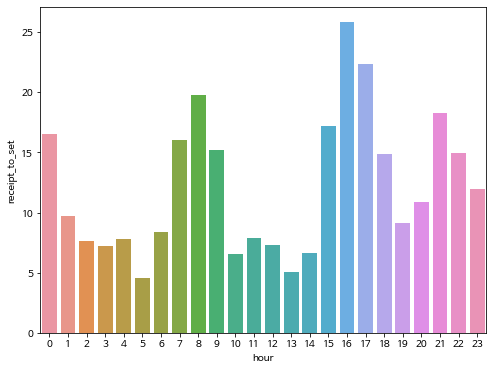

In [ ]:
#시간대 별 배차 대기 시간의 경우 16시에 가장 길었고, 5시에 가장 짧은 것으로 확인

#시간 컬럼 생성
year['hour'] = pd.DatetimeIndex(year['Receipttime']).hour

#'0 days' 삭제
year['receipt_to_set'] = year['receipt_to_set'].str.replace('0 days ','' )

#-1days => 대기시간 0으로 처리
condition = (year['receipt_to_set'].str.contains('-1 days'))
condition = year[condition == True].index
year.loc[condition,'receipt_to_set'] = '00:00:00'

#대기 시간 분단위로 계산하여 컬럼 생성
year['time_receipt_to_set'] =  pd.DatetimeIndex(year['receipt_to_set']).hour * 60 + pd.DatetimeIndex(year['receipt_to_set']).minute

#시간대별 df 생성
per_hour = pd.DataFrame({'hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]})
per_hour['receipt_to_set'] = year.groupby(by =['hour']).mean()['time_receipt_to_set']

#그래프
plt.figure(figsize =[8,6])
sns.barplot(x= 'hour', y = 'receipt_to_set', data = per_hour)


###시간대 별 승차 대기 시간(set_to_ride)

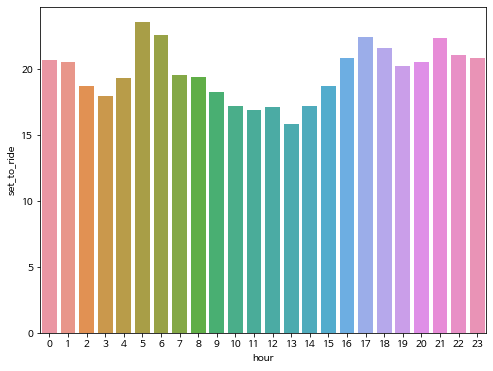

In [ ]:
#시간대 별 승차 대기 시간은 13시에 가장 짧고, 5시에 가장 긴 것을 확인

#'0 days' 삭제
year['set_to_ride'] = year['set_to_ride'].str.replace('0 days ','' )
#-1days => 대기시간 0으로 처리
condition = (year['set_to_ride'].str.contains('-1 days'))
condition = year[condition == True].index
year.loc[condition,'set_to_ride'] = '00:00:00'

#대기 시간 분단위로 계산하여 컬럼 생성
year['time_set_to_ride'] =  pd.DatetimeIndex(year['set_to_ride']).hour * 60 + pd.DatetimeIndex(year['set_to_ride']).minute

#시간대별 df 생성
per_hour = pd.DataFrame({'hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]})
per_hour['set_to_ride'] = year.groupby(by =['hour']).mean()['time_set_to_ride']

#그래프
plt.figure(figsize =[8,6])
sns.barplot(x= 'hour', y = 'set_to_ride', data = per_hour)


### 시간대별 평균 이용량

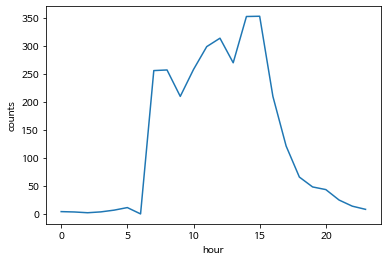

In [ ]:
df =pd.DataFrame(train_year.groupby(by =['hour']).count()['Startpos1'])

df.rename(columns={'Startpos1':'counts'}, inplace=True)
#84일로 나눠서 평균냄
df = df/84

sns.lineplot(x = 'hour', y = 'counts', data = df)

# 전처리

### 트레인 데이터

In [ ]:
train_year = year.copy()
del train_year['Endpos2']
del train_year['Unnamed: 0']
del train_year['Unnamed: 0.1']
del train_year['No']
del train_year['Cartype']

In [ ]:
train_year

,Receipttime,Settime,Ridetime,Startpos1,Startpos2,Endpos1,set_to_ride,receipt_to_set,receipt_to_ride,hour,time_receipt_to_set
0,2021-01-11 00:02:48,2021-01-11 00:03:56,2021-01-11 00:49:38,강서구,가양제3동,마포구,0 days 00:45:42,00:01:08,0 days 00:46:50,0,1.0
1,2021-01-11 00:58:00,2021-01-11 01:04:20,2021-01-11 01:19:47,강북구,번제3동,노원구,0 days 00:15:27,00:06:20,0 days 00:21:47,0,6.0
2,2021-01-11 01:20:00,2021-01-11 01:27:25,2021-01-11 01:43:43,중구,회현동,성동구,0 days 00:16:18,00:07:25,0 days 00:23:43,1,7.0
3,2021-01-11 01:47:00,2021-01-11 01:57:12,2021-01-11 02:44:30,중랑구,면목제2동,서초구,0 days 00:47:18,00:10:12,0 days 00:57:30,1,10.0
4,2021-01-11 02:10:00,2021-01-11 02:18:38,2021-01-11 02:39:32,성동구,금호1가동,중랑구,0 days 00:20:54,00:08:38,0 days 00:29:32,2,8.0
...,...,...,...,...,...,...,...,...,...,...,...
263888,2020-12-13 22:45:00,2020-12-13 22:46:42,2020-12-13 22:54:00,중랑구,면목제4동,노원구,0 days 00:07:18,00:01:42,0 days 00:09:00,22,1.0
263889,2020-12-13 23:08:10,2020-12-13 23:17:14,2020-12-13 23:50:23,강서구,가양제3동,마포구,0 days 00:33:09,00:09:04,0 days 00:42:13,23,9.0
263890,2020-12-13 23:22:00,2020-12-13 23:29:45,2020-12-13 23:53:12,강남구,역삼1동,동작구,0 days 00:23:27,00:07:45,0 days 00:31:12,23,7.0
263891,2020-12-13 23:36:00,2020-12-13 23:43:47,2020-12-13 23:56:50,동대문구,장안제2동,동대문구,0 days 00:13:03,00:07:47,0 days 00:20:50,23,7.0


## 필요한 칼럼 추가

### 평일인지 주말인지 구분하는 is_holiday 추가

In [ ]:
train_year['is_holiday'] = 0

In [ ]:
for h in range(len(train_year['Receipttime'])):
  if "08-15" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1 
  if "08-16" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1 
  if "09-12" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1 
  if "09-13" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "10-09" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "10-10" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "10-11" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "11-14" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "11-15" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "12-12" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "12-13" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "01-16" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "01-17" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "02-10" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "02-11" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "02-12" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "02-13" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "02-14" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "03-13" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "03-14" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "04-10" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "04-11" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "05-15" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "05-16" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "06-12" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if  "06-13" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "07-10" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1
  if "07-11" in train_year['Receipttime'][h]:
    train_year['is_holiday'][h]= 1


In [ ]:
train_year

,Receipttime,Settime,Ridetime,Startpos1,Startpos2,Endpos1,set_to_ride,receipt_to_set,receipt_to_ride,hour,time_receipt_to_set,is_holiday
0,2021-01-11 00:02:48,2021-01-11 00:03:56,2021-01-11 00:49:38,강서구,가양제3동,마포구,0 days 00:45:42,00:01:08,0 days 00:46:50,0,1.0,0
1,2021-01-11 00:58:00,2021-01-11 01:04:20,2021-01-11 01:19:47,강북구,번제3동,노원구,0 days 00:15:27,00:06:20,0 days 00:21:47,0,6.0,0
2,2021-01-11 01:20:00,2021-01-11 01:27:25,2021-01-11 01:43:43,중구,회현동,성동구,0 days 00:16:18,00:07:25,0 days 00:23:43,1,7.0,0
3,2021-01-11 01:47:00,2021-01-11 01:57:12,2021-01-11 02:44:30,중랑구,면목제2동,서초구,0 days 00:47:18,00:10:12,0 days 00:57:30,1,10.0,0
4,2021-01-11 02:10:00,2021-01-11 02:18:38,2021-01-11 02:39:32,성동구,금호1가동,중랑구,0 days 00:20:54,00:08:38,0 days 00:29:32,2,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
263888,2020-12-13 22:45:00,2020-12-13 22:46:42,2020-12-13 22:54:00,중랑구,면목제4동,노원구,0 days 00:07:18,00:01:42,0 days 00:09:00,22,1.0,1
263889,2020-12-13 23:08:10,2020-12-13 23:17:14,2020-12-13 23:50:23,강서구,가양제3동,마포구,0 days 00:33:09,00:09:04,0 days 00:42:13,23,9.0,1
263890,2020-12-13 23:22:00,2020-12-13 23:29:45,2020-12-13 23:53:12,강남구,역삼1동,동작구,0 days 00:23:27,00:07:45,0 days 00:31:12,23,7.0,1
263891,2020-12-13 23:36:00,2020-12-13 23:43:47,2020-12-13 23:56:50,동대문구,장안제2동,동대문구,0 days 00:13:03,00:07:47,0 days 00:20:50,23,7.0,1


### 평일과 주말 이용량 비교

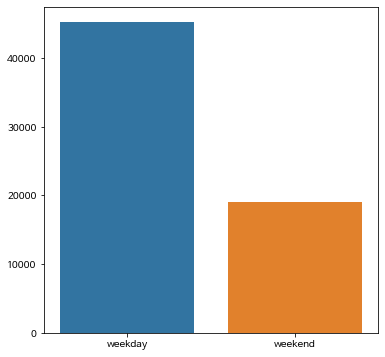

In [ ]:
# is_holiday 
# 평일과 주말 이용량 비교 
groups = train_year.groupby('is_holiday')
group_num = groups.size()
weekday = int(group_num[0] / 5)
weekend = int(group_num[1] / 2)

day = []
day.append(weekday)
day.append(weekend)

fig,ax1 = plt.subplots()
fig.set_size_inches(6,6)
IsHoliday=['weekday','weekend']
sns.barplot( x = IsHoliday, y = day, ax=ax1)

In [ ]:
# 지역별 이용시간 평균 / 배차시간 평균 / 이용자수 / 복지시설 수 
train_year1 = train_year[['Receipttime','Startpos1','set_to_ride','receipt_to_set','receipt_to_ride', 'time_receipt_to_set']]

# 장애인 복지관 데이터
contain_welfare = welfare['시설종류명(시설유형)'].str.contains('(장애인)')   
new_welfare = welfare[contain_welfare]

error = new_welfare[new_welfare['시군구명'] == '서울특별시'].index
welfare1 = new_welfare.drop(error)


# train_year1에서 경기도 지역 삭제
drop_list = ['구리시', '김포시',
       '성남시중원구', '양주시', '광명시', '남양주시', '부천시오정구', '부천시소사구', '안양시만안구',
       '하남시', '의정부시', '과천시', '부천시원미구', '고양시일산동구', '성남시수정구', '부평구',
       '고양시덕양구', '성남시분당구', '안양시동안구', '고양시일산서구', '양평군', '수원시팔달구', '수원시권선구', '용인시수지구', '계양구']

for i in drop_list:
  idx = train_year1[train_year1['Startpos1'] == i].index
  train_year1.drop(idx, inplace=True)

# 출발지역으로 그룹화
group = train_year1.groupby(by=['Startpos1']).mean()
group['startpos_counts'] = train_year1['Startpos1'].value_counts()
group['welfare_counts'] = new_welfare['시군구명'].value_counts()

group

,time_receipt_to_set,startpos_counts,welfare_counts
Startpos1,,,
강남구,14.096933,11577,55
강동구,12.875178,14052,49
강북구,10.763741,9515,30
강서구,12.297471,17716,59
관악구,13.814178,9536,25
광진구,10.538352,7040,14
구로구,13.081272,8615,30
금천구,15.196224,3919,23
노원구,10.385281,27720,60


In [ ]:
test = train_year.copy()

drop_list = ['구리시', '김포시',
       '성남시중원구', '양주시', '광명시', '남양주시', '부천시오정구', '부천시소사구', '안양시만안구',
       '하남시', '의정부시', '과천시', '부천시원미구', '고양시일산동구', '성남시수정구', '부평구',
       '고양시덕양구', '성남시분당구', '안양시동안구', '고양시일산서구', '양평군', '수원시팔달구', '수원시권선구', '용인시수지구']

for i in drop_list:
  idx = test[test['Startpos1']== i].index
  test.drop(idx, inplace=True)
#test.groupby(['month','hour','Startpos1']).count()['Receipttime']

test.groupby(['hour','Startpos1']).count()['Receipttime']

hour  Startpos1
0     강남구          13
      강동구          25
      강북구          45
      강서구          20
      관악구          12
                   ..
23    용산구          20
      은평구          42
      종로구          30
      중구           44
      중랑구          48
Name: Receipttime, Length: 580, dtype: int64

Epoch 1/20
1019/1019 - 4s - loss: 5.5954 - mae: 5.5954 - val_loss: 5.8630 - val_mae: 5.8630
Epoch 2/20
1019/1019 - 2s - loss: 4.9472 - mae: 4.9472 - val_loss: 5.5044 - val_mae: 5.5044
Epoch 3/20
1019/1019 - 2s - loss: 4.6970 - mae: 4.6970 - val_loss: 5.2323 - val_mae: 5.2323
Epoch 4/20
1019/1019 - 2s - loss: 4.6570 - mae: 4.6570 - val_loss: 5.4502 - val_mae: 5.4502
Epoch 5/20
1019/1019 - 2s - loss: 4.6114 - mae: 4.6114 - val_loss: 5.3228 - val_mae: 5.3228
Epoch 6/20
1019/1019 - 2s - loss: 4.6085 - mae: 4.6085 - val_loss: 5.3773 - val_mae: 5.3773
Epoch 7/20
1019/1019 - 2s - loss: 4.5817 - mae: 4.5817 - val_loss: 5.3334 - val_mae: 5.3334
Epoch 8/20
1019/1019 - 2s - loss: 4.5392 - mae: 4.5392 - val_loss: 5.3628 - val_mae: 5.3628
Epoch 9/20
1019/1019 - 2s - loss: 4.4837 - mae: 4.4837 - val_loss: 5.2340 - val_mae: 5.2340
Epoch 10/20
1019/1019 - 2s - loss: 4.5054 - mae: 4.5054 - val_loss: 5.0719 - val_mae: 5.0719
Epoch 11/20
1019/1019 - 2s - loss: 4.5513 - mae: 4.5513 - val_loss: 5.3847 - va

<function matplotlib.pyplot.show>

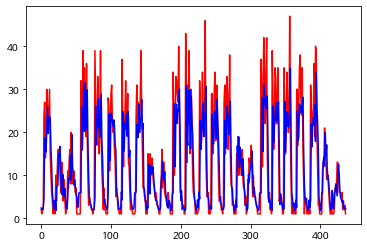

In [ ]:
train_year1 = train_year[['Receipttime','Startpos1','hour','time_receipt_to_set','time_receipt_to_set','is_holiday']]
train_강서 = train_year1[train_year1['Startpos1'] == '강서구']

date_강서 = []
for time in train_강서['Receipttime']: 
  date_강서.append(time[0:10])

train_강서['date'] = date_강서
group_강서 = train_강서.groupby(['date','hour'])

df_강=pd.DataFrame(group_강서.count()['Receipttime'])

new=group_강서.mean()
new_강서 = new.join(df_강)

new_강서.rename(columns={'Receipttime':'count'}, inplace=True)

# 시계열데이터를 윈도우 단위로 자르는 함수
seq = new_강서[['count']].to_numpy()
def seq2dataset(seq, window, horizon):
  X=[];Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x);Y.append(y)
  return np.array(X), np.array(Y)
w=3 #윈도우사이즈 
h=1
X,Y=seq2dataset(seq,w,h)
X,Y
# Y : 1,2,3번째 데이터 3개로 4번째 예측, 2,3,4번째 데이터 3개로 5번째 예측...

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split = int(len(X)*0.7)
x_train = X[0:split];y_train=Y[0:split]
x_test = X[split:]; y_test = Y[split:]

model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist = model.fit(x_train, y_train, epochs=20, batch_size=1, validation_data=(x_test,y_test),verbose=2)


#평가
ev = model.evaluate(x_test,y_test, verbose=0)
print('손실함수 : ', ev[0], 'mae : ', ev[1])


#예측
pred = model.predict(x_test)
print('평균절댓값백분율오차(mape) : ', sum(abs(y_test-pred) / y_test) / len(x_test))


x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.show


# 성능평가

Epoch 1/100
247/247 - 2s - loss: 1922.1339 - mae: 1922.1339 - val_loss: 1360.4932 - val_mae: 1360.4932
Epoch 2/100
247/247 - 1s - loss: 1273.6106 - mae: 1273.6106 - val_loss: 1364.0065 - val_mae: 1364.0065
Epoch 3/100
247/247 - 1s - loss: 1183.9242 - mae: 1183.9242 - val_loss: 1273.5996 - val_mae: 1273.5996
Epoch 4/100
247/247 - 1s - loss: 1134.0668 - mae: 1134.0668 - val_loss: 1233.9299 - val_mae: 1233.9299
Epoch 5/100
247/247 - 1s - loss: 1107.8755 - mae: 1107.8755 - val_loss: 1162.4934 - val_mae: 1162.4934
Epoch 6/100
247/247 - 1s - loss: 1052.5782 - mae: 1052.5782 - val_loss: 1070.6851 - val_mae: 1070.6851
Epoch 7/100
247/247 - 1s - loss: 824.3139 - mae: 824.3139 - val_loss: 885.4246 - val_mae: 885.4246
Epoch 8/100
247/247 - 1s - loss: 861.6954 - mae: 861.6954 - val_loss: 1261.2812 - val_mae: 1261.2812
Epoch 9/100
247/247 - 1s - loss: 977.0418 - mae: 977.0418 - val_loss: 1104.1482 - val_mae: 1104.1482
Epoch 10/100
247/247 - 1s - loss: 883.3802 - mae: 883.3802 - val_loss: 837.0399 -

<function matplotlib.pyplot.show>

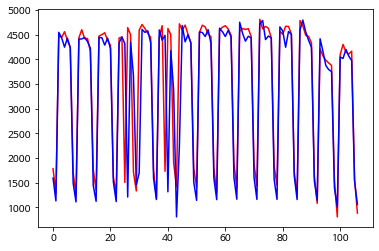

In [ ]:
test_file_path = DATA_PATH +'all_data_08-07.csv'
df = pd.read_csv(test_file_path)

test_df = df[['기준일','탑승건']]
test_df['기준일'] = pd.to_datetime(test_df['기준일'])

# 시계열데이터를 윈도우 단위로 자르는 함수
seq = test_df[['탑승건']].to_numpy()
def seq2dataset(seq, window, horizon):
  X=[];Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x);Y.append(y)
  return np.array(X), np.array(Y)
w= 5 #윈도우사이즈 
h=1
X,Y=seq2dataset(seq,w,h)
X,Y
# Y : 1,2,3번째 데이터 3개로 4번째 예측, 2,3,4번째 데이터 3개로 5번째 예측...

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split = int(len(X)*0.7)
x_train = X[0:split];y_train=Y[0:split]
x_test = X[split:]; y_test = Y[split:]

model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist = model.fit(x_train, y_train, epochs=100, batch_size=1, validation_data=(x_test,y_test),verbose=2)


#평가
ev = model.evaluate(x_test,y_test, verbose=0)
print('손실함수 : ', ev[0], 'mae : ', ev[1])


#예측
pred = model.predict(x_test)
print('평균절댓값백분율오차(mape) : ', sum(abs(y_test-pred) / y_test) / len(x_test))
total_pred = pred

x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red') # 학습 데이터 
plt.plot(x_range, pred[x_range], color='blue') # 예측 
plt.show

In [ ]:
train_year1 = train_year[['Receipttime','Startpos1','hour','time_receipt_to_set','is_holiday']]
train_강서 = train_year1[train_year1['Startpos1'] == '강서구']

date_강서 = []
for time in train_강서['Receipttime']:
  date_강서.append(time[0:10])

train_강서['date'] = date_강서
group_강서 = train_강서.groupby(['hour'])

df_강=pd.DataFrame(group_강서.count()['Receipttime'])

df_서 = pd.DataFrame(group_강서.sum()['is_holiday'])
df_강 = df_강.join(df_서)

new=group_강서['time_receipt_to_set','Receipttime'].mean()
#new = group_강서.mean()
new_강서 = new.join(df_강)


new_강서.rename(columns={'Receipttime':'counts'}, inplace=True)
new_강서

,time_receipt_to_set,counts,is_holiday
hour,,,
0,18.200000,20,8
1,12.388889,18,7
2,5.307692,13,4
3,6.444444,36,2
4,7.795455,44,17
5,3.058824,17,8
6,29.000000,1,1
7,17.404412,1768,219
8,25.845230,1415,175


In [ ]:
new_강서1 = new_강서.copy()

# 예측

- 2021.07.26 ~ 2021.07.31 까지의 장애인 콜택시 이용량
- data_0726to0731.csv 

In [ ]:
data_0726to0731

,기준일,차량운행,희망건,탑승건,평균대기시간,평균요금,평균승차거리
0,2021-07-26,536,4596,4179,27.9,2160,7940
1,2021-07-27,540,4604,4133,26.7,2181,8160
2,2021-07-28,534,4549,4071,27.7,2175,8062
3,2021-07-29,528,4424,3983,27.2,2202,8292
4,2021-07-30,528,4227,3827,26.7,2176,8098
5,2021-07-31,295,1680,1572,21.9,2257,8920


<function matplotlib.pyplot.show>

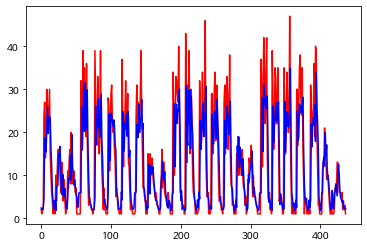

In [ ]:
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red') # 학습 데이터 
plt.plot(x_range, pred[x_range], color='blue') # 예측 
plt.show

### 노원구

In [ ]:
train_노원 = train_year1[train_year1['Startpos1'] == '노원구']

date_노원 = []
for time in train_노원['Receipttime']:
  date_노원.append(time[0:10])

train_노원['date'] = date_노원
group_노원 = train_노원.groupby(['date'])

df_노=pd.DataFrame(group_노원.count()['Receipttime'])

new=group_노원.mean()
new_노원 = new.join(df_노)

new_노원.rename(columns={'Receipttime':'count'}, inplace=True)

seq = new_노원[['count']].to_numpy()
def seq2dataset(seq, window, horizon):
  X=[];Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x);Y.append(y)
  return np.array(X), np.array(Y)
w=7 # 윈도우사이즈 
h=1
X,Y=seq2dataset(seq,w,h)
X,Y


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split = int(len(X)*0.7)
x_train = X[0:split];y_train=Y[0:split]
x_test = X[split:]; y_test = Y[split:]

model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist = model.fit(x_train, y_train, epochs=100, batch_size=1, validation_data=(x_test,y_test),verbose=2)


#평가
ev = model.evaluate(x_test,y_test, verbose=0)
print('손실함수 : ', ev[0], 'mae : ', ev[1])


#예측
pred = model.predict(x_test)
print('평균절댓값백분율오차(mape) : ', sum(abs(y_test-pred) / y_test) / len(x_test))


Epoch 1/100
53/53 - 1s - loss: 189.8853 - mae: 189.8853 - val_loss: 175.2528 - val_mae: 175.2528
Epoch 2/100
53/53 - 0s - loss: 118.2659 - mae: 118.2659 - val_loss: 152.6933 - val_mae: 152.6933
Epoch 3/100
53/53 - 0s - loss: 104.4451 - mae: 104.4451 - val_loss: 107.5671 - val_mae: 107.5671
Epoch 4/100
53/53 - 0s - loss: 104.6939 - mae: 104.6939 - val_loss: 94.6172 - val_mae: 94.6172
Epoch 5/100
53/53 - 0s - loss: 94.1789 - mae: 94.1789 - val_loss: 95.6445 - val_mae: 95.6445
Epoch 6/100
53/53 - 0s - loss: 97.8668 - mae: 97.8668 - val_loss: 107.0276 - val_mae: 107.0276
Epoch 7/100
53/53 - 0s - loss: 94.7342 - mae: 94.7342 - val_loss: 126.5808 - val_mae: 126.5808
Epoch 8/100
53/53 - 0s - loss: 110.3592 - mae: 110.3592 - val_loss: 155.6217 - val_mae: 155.6217
Epoch 9/100
53/53 - 0s - loss: 96.6503 - mae: 96.6503 - val_loss: 102.2354 - val_mae: 102.2354
Epoch 10/100
53/53 - 0s - loss: 97.0552 - mae: 97.0552 - val_loss: 80.5129 - val_mae: 80.5129
Epoch 11/100
53/53 - 0s - loss: 91.6807 - mae

<function matplotlib.pyplot.show>

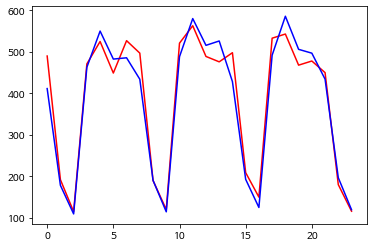

In [ ]:
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.show

### 강서구

In [ ]:
train_강서 = train_year1[train_year1['Startpos1'] == '강서구']

date_강서 = []
for time in train_강서['Receipttime']:
  date_강서.append(time[0:10])

train_강서['date'] = date_강서
group_강서 = train_강서.groupby(['date'])

df_강=pd.DataFrame(group_강서.count()['Receipttime'])

new=group_강서.mean()
new_강서 = new.join(df_강)

new_강서.rename(columns={'Receipttime':'count'}, inplace=True)

new_강서

seq = new_강서[['count']].to_numpy()
def seq2dataset(seq, window, horizon):
  X=[];Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x);Y.append(y)
  return np.array(X), np.array(Y)
w= 7 #윈도우사이즈 
h=1
X,Y=seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split = int(len(X)*0.7)
x_train = X[0:split];y_train=Y[0:split]
x_test = X[split:]; y_test = Y[split:]

model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_test,y_test),verbose=2)


#평가
ev = model.evaluate(x_test,y_test, verbose=0)
print('손실함수 : ', ev[0], 'mae : ', ev[1])


#예측
pred = model.predict(x_test)
print('평균절댓값백분율오차(mape) : ', sum(abs(y_test-pred) / y_test) / len(x_test))


Epoch 1/50
53/53 - 2s - loss: 77.8405 - mae: 77.8405 - val_loss: 52.0777 - val_mae: 52.0777
Epoch 2/50
53/53 - 0s - loss: 56.0534 - mae: 56.0534 - val_loss: 51.2170 - val_mae: 51.2170
Epoch 3/50
53/53 - 0s - loss: 47.5032 - mae: 47.5032 - val_loss: 45.2376 - val_mae: 45.2376
Epoch 4/50
53/53 - 0s - loss: 53.7160 - mae: 53.7160 - val_loss: 56.9665 - val_mae: 56.9665
Epoch 5/50
53/53 - 0s - loss: 58.6162 - mae: 58.6162 - val_loss: 42.5488 - val_mae: 42.5488
Epoch 6/50
53/53 - 0s - loss: 62.0677 - mae: 62.0677 - val_loss: 37.8293 - val_mae: 37.8293
Epoch 7/50
53/53 - 0s - loss: 52.8682 - mae: 52.8682 - val_loss: 58.5644 - val_mae: 58.5644
Epoch 8/50
53/53 - 0s - loss: 46.6622 - mae: 46.6622 - val_loss: 39.0032 - val_mae: 39.0032
Epoch 9/50
53/53 - 0s - loss: 52.9383 - mae: 52.9383 - val_loss: 50.2004 - val_mae: 50.2004
Epoch 10/50
53/53 - 0s - loss: 50.2834 - mae: 50.2834 - val_loss: 36.8505 - val_mae: 36.8505
Epoch 11/50
53/53 - 0s - loss: 44.8656 - mae: 44.8656 - val_loss: 42.1120 - val

<function matplotlib.pyplot.show>

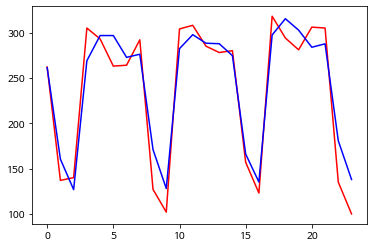

In [ ]:
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.show

### 은평구

In [ ]:

train_은평 = train_year1[train_year1['Startpos1'] == '은평구']

date_은평 = []
for time in train_은평['Receipttime']:
  date_은평.append(time[0:10])

train_은평['date'] = date_은평
group_은평 = train_은평.groupby(['date'])

df_은=pd.DataFrame(group_은평.count()['Receipttime'])

new=group_은평.mean()
new_은평 = new.join(df_은)

new_은평.rename(columns={'Receipttime':'count'}, inplace=True)

seq = new_은평[['count']].to_numpy()
def seq2dataset(seq, window, horizon):
  X=[];Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x);Y.append(y)
  return np.array(X), np.array(Y)
w= 7 #윈도우사이즈 
h=1
X,Y=seq2dataset(seq,w,h)
X,Y

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split = int(len(X)*0.7)
x_train = X[0:split];y_train=Y[0:split]
x_test = X[split:]; y_test = Y[split:]

model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_test,y_test),verbose=2)


#평가
ev = model.evaluate(x_test,y_test, verbose=0)
print('손실함수 : ', ev[0], 'mae : ', ev[1])


#예측
pred = model.predict(x_test)
print('평균절댓값백분율오차(mape) : ', sum(abs(y_test-pred) / y_test) / len(x_test))


Epoch 1/50
53/53 - 1s - loss: 102.5046 - mae: 102.5046 - val_loss: 69.7937 - val_mae: 69.7937
Epoch 2/50
53/53 - 0s - loss: 62.2238 - mae: 62.2238 - val_loss: 53.6179 - val_mae: 53.6179
Epoch 3/50
53/53 - 0s - loss: 57.5199 - mae: 57.5199 - val_loss: 31.1963 - val_mae: 31.1963
Epoch 4/50
53/53 - 0s - loss: 55.7078 - mae: 55.7078 - val_loss: 38.2391 - val_mae: 38.2391
Epoch 5/50
53/53 - 0s - loss: 51.8865 - mae: 51.8865 - val_loss: 39.0955 - val_mae: 39.0955
Epoch 6/50
53/53 - 0s - loss: 47.6052 - mae: 47.6052 - val_loss: 38.1300 - val_mae: 38.1300
Epoch 7/50
53/53 - 0s - loss: 52.8710 - mae: 52.8710 - val_loss: 40.6002 - val_mae: 40.6002
Epoch 8/50
53/53 - 0s - loss: 50.9401 - mae: 50.9401 - val_loss: 28.3712 - val_mae: 28.3712
Epoch 9/50
53/53 - 0s - loss: 47.5961 - mae: 47.5961 - val_loss: 14.0775 - val_mae: 14.0775
Epoch 10/50
53/53 - 0s - loss: 47.2849 - mae: 47.2849 - val_loss: 16.3929 - val_mae: 16.3929
Epoch 11/50
53/53 - 0s - loss: 47.0587 - mae: 47.0587 - val_loss: 61.2800 - v

<function matplotlib.pyplot.show>

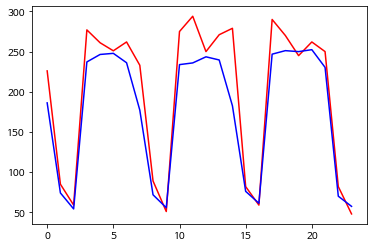

In [ ]:
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.show

### 모델



##### train 데이터 전처리

In [ ]:
def holiday(train_year):
    train_year['is_holiday'] = 0
    train_year['Receipttime'] = train_year['기준일']
    for h in range(len(train_year['Receipttime'])):
        if "08-15" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1 
        if "08-16" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1 
        if "09-12" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1 
        if "09-13" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "10-09" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "10-10" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "10-11" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "11-14" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "11-15" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "12-12" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "12-13" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "01-16" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "01-17" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "02-10" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "02-11" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "02-12" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "02-13" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "02-14" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "03-13" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "03-14" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "04-10" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "04-11" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "05-15" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "05-16" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "06-12" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "06-13" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "07-10" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
        if "07-11" in train_year['Receipttime'][h]:
            train_year['is_holiday'][h]= 1
    return train_year['is_holiday']



In [ ]:
use_data = pd.read_csv(DATA_PATH +'all_data_08-07.csv')
use_data['month'] = pd.DatetimeIndex(use_data['기준일']).month
use_data['day'] = pd.DatetimeIndex(use_data['기준일']).day
use_data.sort_values(by=['month','day'],inplace=True)

train = use_data
holiday(train)
data = train

data.rename(columns = {'차량운행':'NOC', '희망건':'req','탑승건': 'done','평균대기시간':'avg_wait','평균요금':'avg_price','평균승차거리': 'avg_run'},inplace = True)
data =data.drop(['avg_run','avg_price','req','Receipttime','기준일'],axis = 1)

#### 운행 차량 수 예측 모델

In [ ]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
RANDOM_SEED = 42
TEST_SPLIT = 0.2
train_detail = data

#차량 운행 수 예측
x = train_detail.drop(['NOC','avg_wait'],axis=1)
y = train_detail['NOC']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

model = []

# RandomForestRegressor 모델
model.append(('RandomForestRegressor', RandomForestRegressor()))
# LinearRegression 모델
model.append(('LinearRegression', LinearRegression()))
# Ridge 모델
model.append(('Ridge', Ridge()))
# Lasso 모델
model.append(('Lasso', Lasso()))


result = {}

for name, m in model:
    m.fit(x_train, y_train)
    result[name] = (m.score(x_train, y_train), m.score(x_test, y_test))
    print("{}\ttrain_score : {} \ttest_score: {}".format(name, result[name][0], result[name][1]))




RandomForestRegressor	train_score : 0.996216180037444 	test_score: 0.9701166637815952
LinearRegression	train_score : 0.867405274897741 	test_score: 0.8905111863887344
Ridge	train_score : 0.8673944368215957 	test_score: 0.8908427121990224
Lasso	train_score : 0.8664813561027763 	test_score: 0.8930369407637133


In [ ]:
#0726-0731 데이터로 테스트

test_df = data_0726to0731.copy()
test_df['month'] = pd.DatetimeIndex(test_df['기준일']).month
test_df['day'] = pd.DatetimeIndex(test_df['기준일']).day
test_df.sort_values(by=['month','day'],inplace=True)

test_df['is_holiday'] = [0,0,0,0,0,1]
test_df.rename(columns = {'차량운행':'NOC', '희망건':'req','탑승건': 'done','평균대기시간':'avg_wait','평균요금':'avg_price','평균승차거리': 'avg_run'},inplace = True)
test_df =test_df.drop(['avg_run','avg_price','req','기준일'],axis = 1)

In [ ]:
#일 별 예측 수요(평일6-주말1인 데이터 임의 추출)
noc_pred = total_pred[2:8]  
noc_pred = list(map(int,noc_pred))
noc_pred


[4550, 4438, 4250, 4432, 4240, 1493]

In [ ]:
#예측 출력
test = pd.DataFrame({'done':noc_pred,'month':[7]*6,'day':[i for i in range(26,32)],'is_holiday':[0,0,0,0,0,1]})
test_input = test
test_predict = model[0][1].predict(test_input)
#test_predict
test_input['NOC'] = test_predict
test_input

,done,month,day,is_holiday,NOC
0,4550,7,26,0,565.59
1,4438,7,27,0,564.31
2,4250,7,28,0,565.76
3,4432,7,29,0,565.95
4,4240,7,30,0,573.80
5,1493,7,31,1,278.44


In [ ]:
#실제 값과 비교
test_input['real-done'] = test_df['done']
test_input['real-NOC'] = test_df['NOC']
test_input

,done,month,day,is_holiday,real-done,real-NOC
0,4550,7,26,0,4179,536
1,4438,7,27,0,4133,540
2,4250,7,28,0,4071,534
3,4432,7,29,0,3983,528
4,4240,7,30,0,3827,528
5,1493,7,31,1,1572,295


#### 평균 대기 시간 예측 모델

In [ ]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
RANDOM_SEED = 42
TEST_SPLIT = 0.2
train_detail = data

#평균 대기시간 예측
x = train_detail.drop(['avg_wait'],axis=1)
y = train_detail['avg_wait']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

model = []

# RandomForestRegressor 모델
model.append(('RandomForestRegressor', RandomForestRegressor()))
# LinearRegression 모델
model.append(('LinearRegression', LinearRegression()))
# Ridge 모델
model.append(('Ridge', Ridge()))
# Lasso 모델
model.append(('Lasso', Lasso()))


result = {}

for name, m in model:
    m.fit(x_train, y_train)
    result[name] = (m.score(x_train, y_train), m.score(x_test, y_test))
    print("{}\ttrain_score : {} \ttest_score: {}".format(name, result[name][0], result[name][1]))



RandomForestRegressor	train_score : 0.9717915963010388 	test_score: 0.7254446565362183
LinearRegression	train_score : 0.7311249332763983 	test_score: 0.6612555467464906
Ridge	train_score : 0.7311221517195623 	test_score: 0.661371981712243
Lasso	train_score : 0.7277692705298947 	test_score: 0.6705398945294635


In [ ]:
#test = pd.DataFrame({'done':[int(pred[2]),int(pred[3])],'month':[5,7],'day':[10,10],'is_holiday':[0,1]})
test_input = test_input[['done','NOC','month','day','is_holiday']]
test_predict = model[0][1].predict(test_input)
test_predict
test_input['avg_wait'] = test_predict
test_input

,done,NOC,month,day,is_holiday,avg_wait
0,4550,565.59,7,26,0,18.959
1,4438,564.31,7,27,0,18.956
2,4250,565.76,7,28,0,19.001
3,4432,565.95,7,29,0,19.120
4,4240,573.80,7,30,0,19.113
5,1493,278.44,7,31,1,19.149


In [ ]:
#실제 값과 비교
test_input['real-done'] = test_df['done']
test_input['real-NOC'] = test_df['NOC']
test_input['real-wait'] = test_df['avg_wait']
test_input

,done,NOC,month,day,is_holiday,avg_wait,real-done,real-NOC,real-wait
0,4550,565.59,7,26,0,18.959,4179,536,27.9
1,4438,564.31,7,27,0,18.956,4133,540,26.7
2,4250,565.76,7,28,0,19.001,4071,534,27.7
3,4432,565.95,7,29,0,19.120,3983,528,27.2
4,4240,573.80,7,30,0,19.113,3827,528,26.7
5,1493,278.44,7,31,1,19.149,1572,295,21.9
